# 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [ ]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [ ]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [ ]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [ ]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [ ]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
df_sin_quarter

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,독서실,신촌동,169054586,18,1,0
1,2017-1,서비스,교육,스포츠강습,신촌동,795837623,23,1,0
2,2017-1,서비스,교육,예술학원,신촌동,1162571945,28,1,0
3,2017-1,서비스,교육,외국어학원,신촌동,3196308868,24,2,2
4,2017-1,서비스,교육,일반교습학원,신촌동,762815407,9,1,3
...,...,...,...,...,...,...,...,...,...
1339,2022-4,외식,식사류,패스트푸드점,신촌동,3057584360,83,0,4
1340,2022-4,외식,식사류,한식음식점,신촌동,29617724330,435,8,12
1341,2022-4,외식,주류,호프-간이주점,신촌동,7366806532,171,1,6
1342,2022-4,외식,카페/베이커리,제과점,신촌동,1302230221,48,3,2


# 미용실

In [ ]:
# 미용실만 남기기
sin_hair = df_sin_quarter[df_sin_quarter.업종명 == '미용실'].reset_index().drop('index', axis=1)
sin_hair

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,미용,미용실,신촌동,7764672299,179,4,4
1,2017-2,서비스,미용,미용실,신촌동,8397734409,184,7,2
2,2017-3,서비스,미용,미용실,신촌동,8315531210,183,2,3
3,2017-4,서비스,미용,미용실,신촌동,7405160880,180,4,7
4,2018-1,서비스,미용,미용실,신촌동,7422750825,184,5,1
5,2018-2,서비스,미용,미용실,신촌동,7479498178,184,8,8
6,2018-3,서비스,미용,미용실,신촌동,7689226604,186,6,4
7,2018-4,서비스,미용,미용실,신촌동,7025771752,189,6,3
8,2019-1,서비스,미용,미용실,신촌동,6333135287,186,3,6
9,2019-2,서비스,미용,미용실,신촌동,5662679870,187,5,4


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [ ]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_hair['성장성'] = sin_hair['분기당_매출_금액'] / sin_hair['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_hair['성장성'][0] = 1

sin_hair

<ipython-input-11-570e95a1083d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hair['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,미용,미용실,신촌동,7764672299,179,4,4,1.000000
1,2017-2,서비스,미용,미용실,신촌동,8397734409,184,7,2,1.081531
2,2017-3,서비스,미용,미용실,신촌동,8315531210,183,2,3,0.990211
3,2017-4,서비스,미용,미용실,신촌동,7405160880,180,4,7,0.890522
4,2018-1,서비스,미용,미용실,신촌동,7422750825,184,5,1,1.002375
5,2018-2,서비스,미용,미용실,신촌동,7479498178,184,8,8,1.007645
6,2018-3,서비스,미용,미용실,신촌동,7689226604,186,6,4,1.028040
7,2018-4,서비스,미용,미용실,신촌동,7025771752,189,6,3,0.913716
8,2019-1,서비스,미용,미용실,신촌동,6333135287,186,3,6,0.901415
9,2019-2,서비스,미용,미용실,신촌동,5662679870,187,5,4,0.894135


In [ ]:
# 개업률, 폐업률, 순점포증감률 추가

sin_hair['개업률'] = (sin_hair['개업점포수'] / sin_hair['총 점포수']) * 100
sin_hair['폐업률'] = (sin_hair['폐업점포수'] / sin_hair['총 점포수']) * 100
sin_hair['순점포증감률'] = ((sin_hair['개업점포수'] - sin_hair['폐업점포수']) / sin_hair['총 점포수']) * 100

# sin_hair

In [ ]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 미용실만 남기기
seo_hair = df_seo_quarter[df_seo_quarter['업종명'] == '미용실'].reset_index()

################################################################################################################################################################################################

sin_hair['시장성'] = (sin_hair['분기당_매출_금액'] / sin_hair['총 점포수']) - (seo_hair['분기당_매출_금액'] / seo_hair['총 점포수'])

sin_hair = sin_hair[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,7764672299,1.000000,0.000000,1.483898e+07
1,2017-2,미용실,8397734409,1.081531,2.717391,1.548575e+07
2,2017-3,미용실,8315531210,0.990211,-0.546448,1.569170e+07
3,2017-4,미용실,7405160880,0.890522,-1.666667,1.444630e+07
4,2018-1,미용실,7422750825,1.002375,2.173913,1.351441e+07
5,2018-2,미용실,7479498178,1.007645,0.000000,1.337102e+07
6,2018-3,미용실,7689226604,1.028040,1.075269,1.314082e+07
7,2018-4,미용실,7025771752,0.913716,1.587302,1.193786e+07
8,2019-1,미용실,6333135287,0.901415,-1.612903,1.204067e+07
9,2019-2,미용실,5662679870,0.894135,0.534759,9.819223e+06


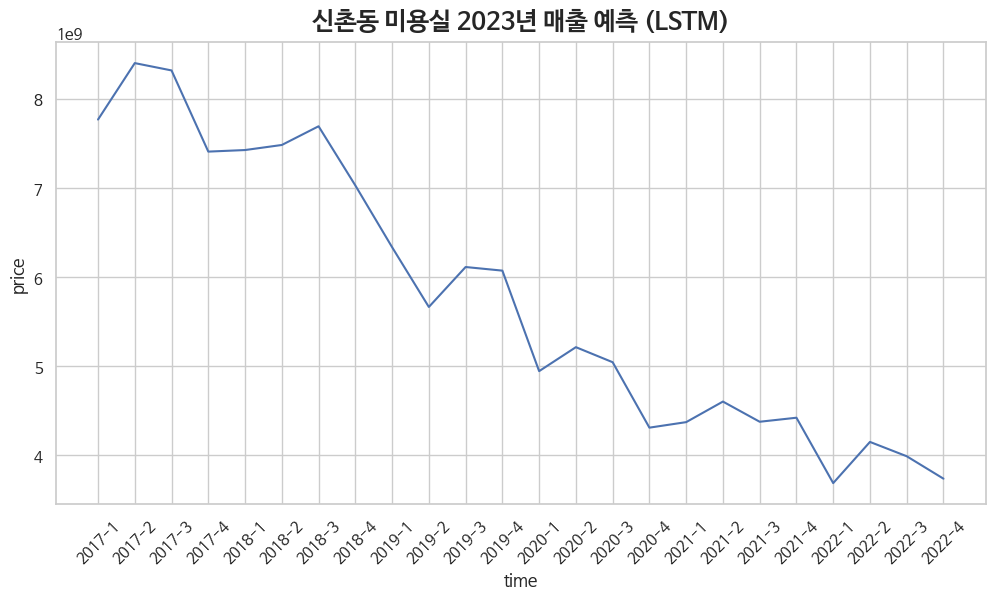

In [ ]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화

sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['분기당_매출_금액'])
plt.title('신촌동 미용실 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [ ]:
### X / y 데이터 생성
X = sin_hair[['성장성', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  1.483898e+07  0.000000
1   1.081531  1.548575e+07  2.717391
2   0.990211  1.569170e+07 -0.546448
3   0.890522  1.444630e+07 -1.666667
4   1.002375  1.351441e+07  2.173913
5   1.007645  1.337102e+07  0.000000
6   1.028040  1.314082e+07  1.075269
7   0.913716  1.193786e+07  1.587302
8   0.901415  1.204067e+07 -1.612903
9   0.894135  9.819223e+06  0.534759
10  1.079133  1.105319e+07 -0.534759
11  0.993370  1.007525e+07  1.063830
12  0.814299  7.236823e+06  0.531915
13  1.054393  6.763077e+06  2.094241
14  0.967624  7.922830e+06 -3.243243
15  0.854485  6.189667e+06 -1.098901
16  1.014337  6.477798e+06 -0.552486
17  1.052767  6.339091e+06 -1.117318
18  0.950822  5.305175e+06 -0.561798
19  1.010331  6.547636e+06 -0.564972
20  0.834117  4.638403e+06  0.000000
21  1.125263  5.363553e+06 -0.568182
22  0.961292  5.718409e+06 -1.156069
23  0.936905  5.011409e+06  1.704545
---------------------------------------------------------------------------

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.47270206 0.0977089  0.35015968]
 [0.39427735 0.03374615 0.83007751]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')

model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5696
Epoch 1: val_loss improved from inf to 0.05147, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5696 - val_loss: 0.0515
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5486
Epoch 2: val_loss improved from 0.05147 to 0.04695, saving model to stock_model.h5
1/1 [==============================] - 0s 133ms/step - loss: 0.5486 - val_loss: 0.0470
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5285
Epoch 3: val_loss improved from 0.04695 to 0.04270, saving model to stock_model.h5
1/1 [==============================] - 0s 146ms/step - loss: 0.5285 - val_loss: 0.0427
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5090
Epoch 4: val_loss improved from 0.04270 to 0.03870, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.5090 - val_loss: 0.0387
Epoch 5/100
1/1 [==============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 866ms/step
[[0.19802377]
 [0.19722715]
 [0.19037905]
 [0.21369173]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.000000,0.198024
2022-2,0.098055,0.197227
2022-3,0.063960,0.190379
2022-4,0.010534,0.213692


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.000000,0.198024,3687314810,4.620090e+09,-932775046.0
2022-2,0.098055,0.197227,4149197333,4.616337e+09,-467140075.0
2022-3,0.063960,0.190379,3988591714,4.584080e+09,-595488158.0
2022-4,0.010534,0.213692,3736932214,4.693893e+09,-956960394.0


### 결과

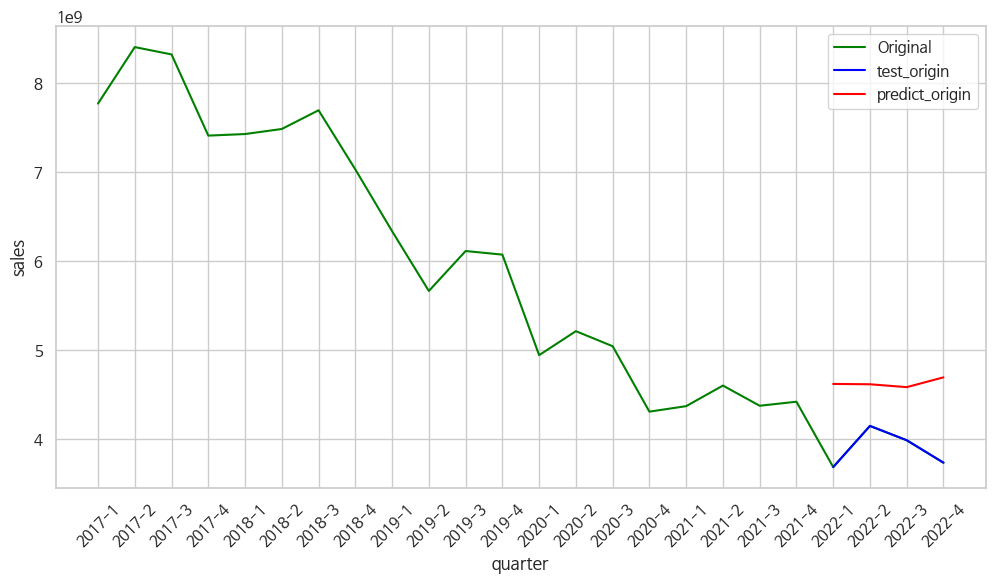

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -7.380909e+08
std      2.446465e+08
min     -9.569604e+08
25%     -9.388214e+08
50%     -7.641316e+08
75%     -5.634011e+08
max     -4.671401e+08
dtype: float64

In [ ]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.19995777]]
--------------------------------------------------------------------------------
예측된 매출  : 4629199872.0 


## 23년 1분기 성장성 예측

In [ ]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   7764672299  1.483898e+07  0.000000
1   8397734409  1.548575e+07  2.717391
2   8315531210  1.569170e+07 -0.546448
3   7405160880  1.444630e+07 -1.666667
4   7422750825  1.351441e+07  2.173913
5   7479498178  1.337102e+07  0.000000
6   7689226604  1.314082e+07  1.075269
7   7025771752  1.193786e+07  1.587302
8   6333135287  1.204067e+07 -1.612903
9   5662679870  9.819223e+06  0.534759
10  6110785311  1.105319e+07 -0.534759
11  6070273570  1.007525e+07  1.063830
12  4943020524  7.236823e+06  0.531915
13  5211885214  6.763077e+06  2.094241
14  5043145857  7.922830e+06 -3.243243
15  4309294904  6.189667e+06 -1.098901
16  4371075518  6.477798e+06 -0.552486
17  4601724542  6.339091e+06 -1.117318
18  4375422081  5.305175e+06 -0.561798
19  4420622879  6.547636e+06 -0.564972
20  3687314810  4.638403e+06  0.000000
21  4149197333  5.363553e+06 -0.568182
22  3988591714  5.718409e+06 -1.156069
23  3736932214  5.011409e+06  1.704545
-------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.06395967 0.0977089  0.35015968]
 [0.01053354 0.03374615 0.83007751]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3333
Epoch 1: val_loss improved from inf to 0.31156, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3333 - val_loss: 0.3116
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3174
Epoch 2: val_loss improved from 0.31156 to 0.30246, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.3174 - val_loss: 0.3025
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3022
Epoch 3: val_loss improved from 0.30246 to 0.29367, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.3022 - val_loss: 0.2937
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2876
Epoch 4: val_loss improved from 0.29367 to 0.28517, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2876 - val_loss: 0.2852
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.31770203]
 [0.31873664]
 [0.29807207]
 [0.2974684 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.063728,0.317702
2022-2,1.000000,0.318737
2022-3,0.472702,0.298072
2022-4,0.394277,0.297468


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 3].values       # 성장성이 sin_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.063728,0.317702,0.834117,0.913093,-0.078976
2022-2,1.000000,0.318737,1.125263,0.913415,0.211848
2022-3,0.472702,0.298072,0.961292,0.906989,0.054304
2022-4,0.394277,0.297468,0.936905,0.906801,0.030104


### 결과

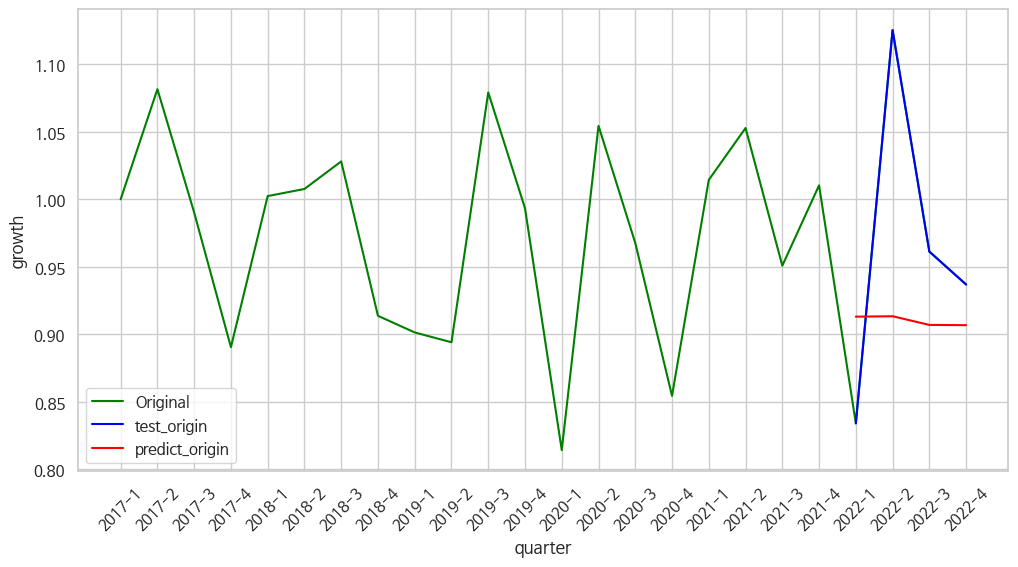

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.054320
std      0.119957
min     -0.078976
25%      0.002834
50%      0.042204
75%      0.093690
max      0.211848
dtype: float64

In [ ]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.31011856]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9107348918914795 


## 23년 1분기 시장성 예측

In [ ]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hair[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  7764672299  0.000000
1   1.081531  8397734409  2.717391
2   0.990211  8315531210 -0.546448
3   0.890522  7405160880 -1.666667
4   1.002375  7422750825  2.173913
5   1.007645  7479498178  0.000000
6   1.028040  7689226604  1.075269
7   0.913716  7025771752  1.587302
8   0.901415  6333135287 -1.612903
9   0.894135  5662679870  0.534759
10  1.079133  6110785311 -0.534759
11  0.993370  6070273570  1.063830
12  0.814299  4943020524  0.531915
13  1.054393  5211885214  2.094241
14  0.967624  5043145857 -3.243243
15  0.854485  4309294904 -1.098901
16  1.014337  4371075518 -0.552486
17  1.052767  4601724542 -1.117318
18  0.950822  4375422081 -0.561798
19  1.010331  4420622879 -0.564972
20  0.834117  3687314810  0.000000
21  1.125263  4149197333 -0.568182
22  0.961292  3988591714 -1.156069
23  0.936905  3736932214  1.704545
--------------------------------------------------------------------------------
             시장성
0   1.483898e+07
1   1.5485

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.47270206 0.06395967 0.35015968]
 [0.39427735 0.01053354 0.83007751]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5931
Epoch 1: val_loss improved from inf to 0.03918, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5931 - val_loss: 0.0392
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5717
Epoch 2: val_loss improved from 0.03918 to 0.03524, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.5717 - val_loss: 0.0352
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5511
Epoch 3: val_loss improved from 0.03524 to 0.03157, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.5511 - val_loss: 0.0316
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5312
Epoch 4: val_loss improved from 0.03157 to 0.02817, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.5312 - val_loss: 0.0282
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.16214846]
 [0.1583887 ]
 [0.15480123]
 [0.17245066]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.000000,0.162148
2022-2,0.065605,0.158389
2022-3,0.097709,0.154801
2022-4,0.033746,0.172451


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 5].values       # 시장성이 sin_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.000000,0.162148,4.638403e+06,6430679.0,-1.792276e+06
2022-2,0.065605,0.158389,5.363553e+06,6389121.0,-1.025568e+06
2022-3,0.097709,0.154801,5.718409e+06,6349468.0,-6.310592e+05
2022-4,0.033746,0.172451,5.011409e+06,6544552.0,-1.533143e+06


### 결과

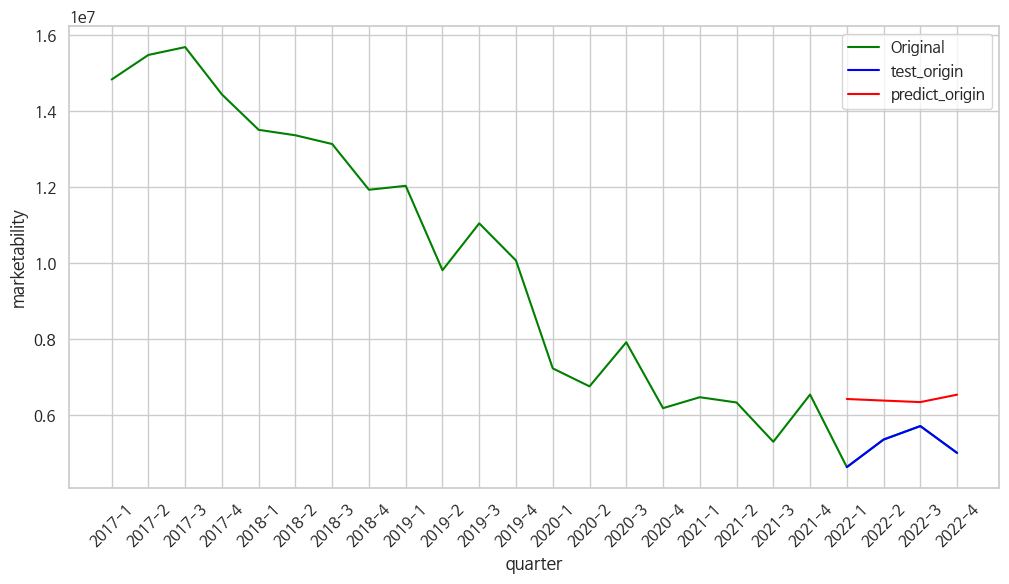

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.245512e+06
std      5.188481e+05
min     -1.792276e+06
25%     -1.597926e+06
50%     -1.279355e+06
75%     -9.269409e+05
max     -6.310592e+05
dtype: float64

In [ ]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 33ms/step
[[0.16014516]]
--------------------------------------------------------------------------------
예측된 시장성  : 6408536.0 


## 23년 1분기 순점포증감률 예측

In [ ]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_hair[['성장성', '분기당_매출_금액', '시장성']]
y = sin_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  7764672299  1.483898e+07
1   1.081531  8397734409  1.548575e+07
2   0.990211  8315531210  1.569170e+07
3   0.890522  7405160880  1.444630e+07
4   1.002375  7422750825  1.351441e+07
5   1.007645  7479498178  1.337102e+07
6   1.028040  7689226604  1.314082e+07
7   0.913716  7025771752  1.193786e+07
8   0.901415  6333135287  1.204067e+07
9   0.894135  5662679870  9.819223e+06
10  1.079133  6110785311  1.105319e+07
11  0.993370  6070273570  1.007525e+07
12  0.814299  4943020524  7.236823e+06
13  1.054393  5211885214  6.763077e+06
14  0.967624  5043145857  7.922830e+06
15  0.854485  4309294904  6.189667e+06
16  1.014337  4371075518  6.477798e+06
17  1.052767  4601724542  6.339091e+06
18  0.950822  4375422081  5.305175e+06
19  1.010331  4420622879  6.547636e+06
20  0.834117  3687314810  4.638403e+06
21  1.125263  4149197333  5.363553e+06
22  0.961292  3988591714  5.718409e+06
23  0.936905  3736932214  5.011409e+06
-------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.47270206 0.06395967 0.0977089 ]
 [0.39427735 0.01053354 0.03374615]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4268
Epoch 1: val_loss improved from inf to 0.26686, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4268 - val_loss: 0.2669
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4086
Epoch 2: val_loss improved from 0.26686 to 0.25781, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4086 - val_loss: 0.2578
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3912
Epoch 3: val_loss improved from 0.25781 to 0.24906, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.3912 - val_loss: 0.2491
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3744
Epoch 4: val_loss improved from 0.24906 to 0.24058, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.3744 - val_loss: 0.2406
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.34942618]
 [0.3373667 ]
 [0.28986597]
 [0.37985355]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.544110,0.349426
2022-2,0.448788,0.337367
2022-3,0.350160,0.289866
2022-4,0.830078,0.379854


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.544110,0.349426,0.000000,-1.160442,1.160442
2022-2,0.448788,0.337367,-0.568182,-1.232324,0.664142
2022-3,0.350160,0.289866,-1.156069,-1.515458,0.359389
2022-4,0.830078,0.379854,1.704545,-0.979075,2.683621


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


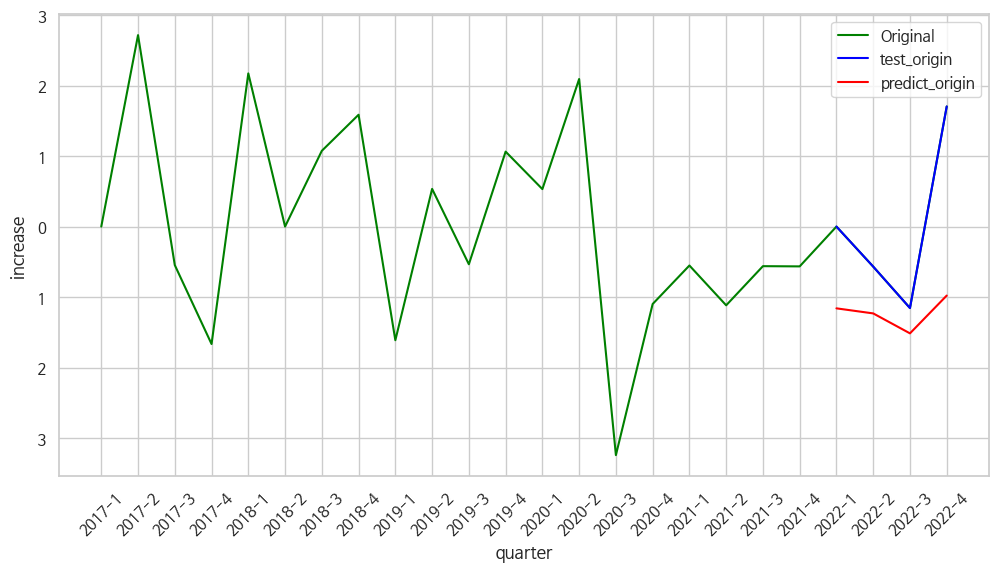

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.216898
std      1.032041
min      0.359389
25%      0.587954
50%      0.912292
75%      1.541236
max      2.683621
dtype: float64

In [ ]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 37ms/step
[[0.31816557]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.3467745780944824 


## 원본 데이터에 예측값 추가하기

In [ ]:
print(sales)
print(growth)
print(marketability)
print(increase)

4629200000.0
0.9107349
6408536.0
-1.3467746


In [ ]:
sin_hair.loc[24] = ['2023-1', '미용실', sales, growth, increase, marketability]

<ipython-input-70-5aad317a03ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hair.loc[24] = ['2023-1', '미용실', sales, growth, increase, marketability]


In [ ]:
sin_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,7.764672e+09,1.000000,0.000000,1.483898e+07
1,2017-2,미용실,8.397734e+09,1.081531,2.717391,1.548575e+07
2,2017-3,미용실,8.315531e+09,0.990211,-0.546448,1.569170e+07
3,2017-4,미용실,7.405161e+09,0.890522,-1.666667,1.444630e+07
4,2018-1,미용실,7.422751e+09,1.002375,2.173913,1.351441e+07
5,2018-2,미용실,7.479498e+09,1.007645,0.000000,1.337102e+07
6,2018-3,미용실,7.689227e+09,1.028040,1.075269,1.314082e+07
7,2018-4,미용실,7.025772e+09,0.913716,1.587302,1.193786e+07
8,2019-1,미용실,6.333135e+09,0.901415,-1.612903,1.204067e+07
9,2019-2,미용실,5.662680e+09,0.894135,0.534759,9.819223e+06


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [ ]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_hair[['성장성', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  1.483898e+07  0.000000
1   1.081531  1.548575e+07  2.717391
2   0.990211  1.569170e+07 -0.546448
3   0.890522  1.444630e+07 -1.666667
4   1.002375  1.351441e+07  2.173913
5   1.007645  1.337102e+07  0.000000
6   1.028040  1.314082e+07  1.075269
7   0.913716  1.193786e+07  1.587302
8   0.901415  1.204067e+07 -1.612903
9   0.894135  9.819223e+06  0.534759
10  1.079133  1.105319e+07 -0.534759
11  0.993370  1.007525e+07  1.063830
12  0.814299  7.236823e+06  0.531915
13  1.054393  6.763077e+06  2.094241
14  0.967624  7.922830e+06 -3.243243
15  0.854485  6.189667e+06 -1.098901
16  1.014337  6.477798e+06 -0.552486
17  1.052767  6.339091e+06 -1.117318
18  0.950822  5.305175e+06 -0.561798
19  1.010331  6.547636e+06 -0.564972
20  0.834117  4.638403e+06  0.000000
21  1.125263  5.363553e+06 -0.568182
22  0.961292  5.718409e+06 -1.156069
23  0.936905  5.011409e+06  1.704545
24  0.910735  6.408536e+06 -1.346775
--------------------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.39427735 0.03374615 0.83007751]
 [0.31011855 0.16014519 0.31816557]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5259
Epoch 1: val_loss improved from inf to 0.04127, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5259 - val_loss: 0.0413
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5061
Epoch 2: val_loss improved from 0.04127 to 0.03765, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.5061 - val_loss: 0.0376
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4871
Epoch 3: val_loss improved from 0.03765 to 0.03428, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4871 - val_loss: 0.0343
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4688
Epoch 4: val_loss improved from 0.03428 to 0.03114, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4688 - val_loss: 0.0311
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 813ms/step
[[0.17090178]
 [0.165539  ]
 [0.18536606]
 [0.17363253]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.098055,0.170902
2022-3,0.063960,0.165539
2022-4,0.010534,0.185366
2023-1,0.199958,0.173633


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.098055,0.170902,4.149197e+09,4.492334e+09,-343136747.0
2022-3,0.063960,0.165539,3.988592e+09,4.467073e+09,-478481310.0
2022-4,0.010534,0.185366,3.736932e+09,4.560466e+09,-823534218.0
2023-1,0.199958,0.173633,4.629200e+09,4.505197e+09,124002816.0


In [ ]:
df_test = df_test.reset_index()

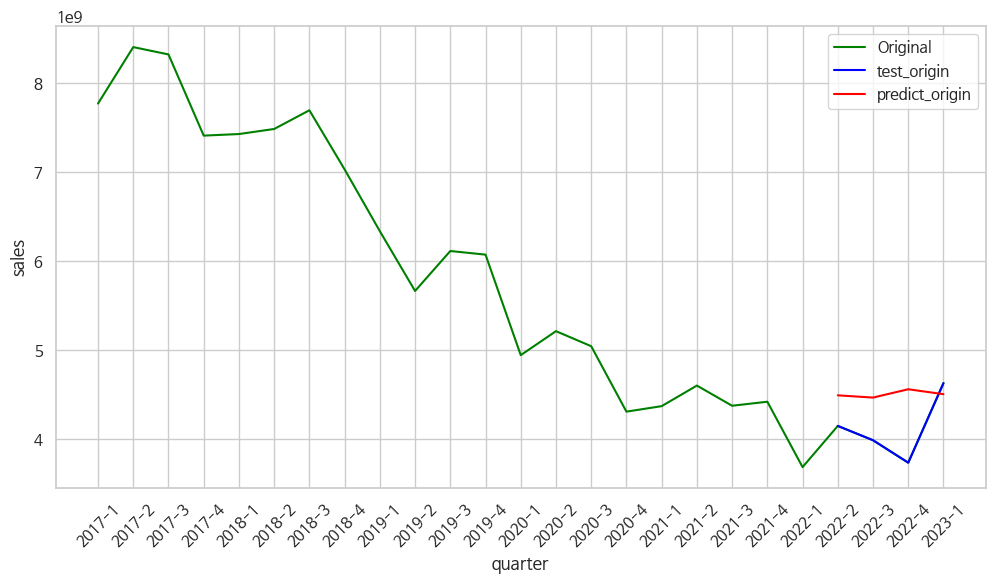

In [ ]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.802874e+08
std      3.923428e+08
min     -8.235342e+08
25%     -5.647445e+08
50%     -4.108090e+08
75%     -2.263519e+08
max      1.240028e+08
dtype: float64

In [ ]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.1781185]]
--------------------------------------------------------------------------------
예측된 매출  : 4526327808.0 


### 성장성

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   7.764672e+09  1.483898e+07  0.000000
1   8.397734e+09  1.548575e+07  2.717391
2   8.315531e+09  1.569170e+07 -0.546448
3   7.405161e+09  1.444630e+07 -1.666667
4   7.422751e+09  1.351441e+07  2.173913
5   7.479498e+09  1.337102e+07  0.000000
6   7.689227e+09  1.314082e+07  1.075269
7   7.025772e+09  1.193786e+07  1.587302
8   6.333135e+09  1.204067e+07 -1.612903
9   5.662680e+09  9.819223e+06  0.534759
10  6.110785e+09  1.105319e+07 -0.534759
11  6.070274e+09  1.007525e+07  1.063830
12  4.943021e+09  7.236823e+06  0.531915
13  5.211885e+09  6.763077e+06  2.094241
14  5.043146e+09  7.922830e+06 -3.243243
15  4.309295e+09  6.189667e+06 -1.098901
16  4.371076e+09  6.477798e+06 -0.552486
17  4.601725e+09  6.339091e+06 -1.117318
18  4.375422e+09  5.305175e+06 -0.561798
19  4.420623e+09  6.547636e+06 -0.564972
20  3.687315e+09  4.638403e+06  0.000000
21  4.149197e+09  5.363553e+06 -0.568182
22  3.988592e+09  5.718409e+06 -1.156069
23  3.736932e+09

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.01053354 0.03374615 0.83007751]
 [0.19995778 0.16014519 0.31816557]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3031
Epoch 1: val_loss improved from inf to 0.31205, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.3031 - val_loss: 0.3121
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2886
Epoch 2: val_loss improved from 0.31205 to 0.30286, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2886 - val_loss: 0.3029
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2747
Epoch 3: val_loss improved from 0.30286 to 0.29396, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2747 - val_loss: 0.2940
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2615
Epoch 4: val_loss improved from 0.29396 to 0.28534, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2615 - val_loss: 0.2853
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 832ms/step
[[0.29964182]
 [0.28007156]
 [0.2796173 ]
 [0.29145804]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.299642
2022-3,0.472702,0.280072
2022-4,0.394277,0.279617
2023-1,0.310119,0.291458


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 3].values       # 성장성이 sin_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.299642,1.125263,0.907477,0.217786
2022-3,0.472702,0.280072,0.961292,0.901391,0.059901
2022-4,0.394277,0.279617,0.936905,0.901250,0.035655
2023-1,0.310119,0.291458,0.910735,0.904932,0.005803


In [ ]:
df_test = df_test.reset_index()

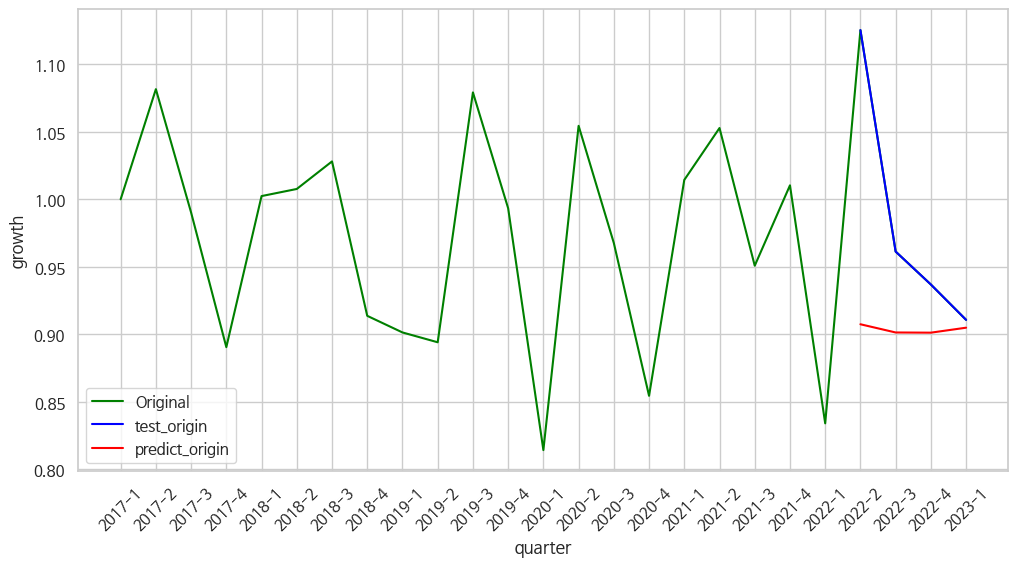

In [ ]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.079786
std      0.094623
min      0.005803
25%      0.028192
50%      0.047778
75%      0.099372
max      0.217786
dtype: float64

In [ ]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.31799477]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9131841063499451 


### 시장성

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   7.764672e+09  1.000000  0.000000
1   8.397734e+09  1.081531  2.717391
2   8.315531e+09  0.990211 -0.546448
3   7.405161e+09  0.890522 -1.666667
4   7.422751e+09  1.002375  2.173913
5   7.479498e+09  1.007645  0.000000
6   7.689227e+09  1.028040  1.075269
7   7.025772e+09  0.913716  1.587302
8   6.333135e+09  0.901415 -1.612903
9   5.662680e+09  0.894135  0.534759
10  6.110785e+09  1.079133 -0.534759
11  6.070274e+09  0.993370  1.063830
12  4.943021e+09  0.814299  0.531915
13  5.211885e+09  1.054393  2.094241
14  5.043146e+09  0.967624 -3.243243
15  4.309295e+09  0.854485 -1.098901
16  4.371076e+09  1.014337 -0.552486
17  4.601725e+09  1.052767 -1.117318
18  4.375422e+09  0.950822 -0.561798
19  4.420623e+09  1.010331 -0.564972
20  3.687315e+09  0.834117  0.000000
21  4.149197e+09  1.125263 -0.568182
22  3.988592e+09  0.961292 -1.156069
23  3.736932e+09  0.936905  1.704545
24  4.629200e+09  0.910735 -1.346775
--------------------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.01053354 0.39427735 0.83007751]
 [0.19995778 0.31011855 0.31816557]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5346
Epoch 1: val_loss improved from inf to 0.03299, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5346 - val_loss: 0.0330
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5149
Epoch 2: val_loss improved from 0.03299 to 0.02962, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.5149 - val_loss: 0.0296
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4959
Epoch 3: val_loss improved from 0.02962 to 0.02652, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4959 - val_loss: 0.0265
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4775
Epoch 4: val_loss improved from 0.02652 to 0.02366, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.4775 - val_loss: 0.0237
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.14068261]
 [0.13525344]
 [0.14249444]
 [0.13999979]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.065605,0.140683
2022-3,0.097709,0.135253
2022-4,0.033746,0.142494
2023-1,0.160145,0.140000


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 5].values       # 시장성이 sin_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.065605,0.140683,5.363553e+06,6193410.0,-8.298571e+05
2022-3,0.097709,0.135253,5.718409e+06,6133400.0,-4.149912e+05
2022-4,0.033746,0.142494,5.011409e+06,6213437.0,-1.202028e+06
2023-1,0.160145,0.140000,6.408536e+06,6185863.0,2.226730e+05


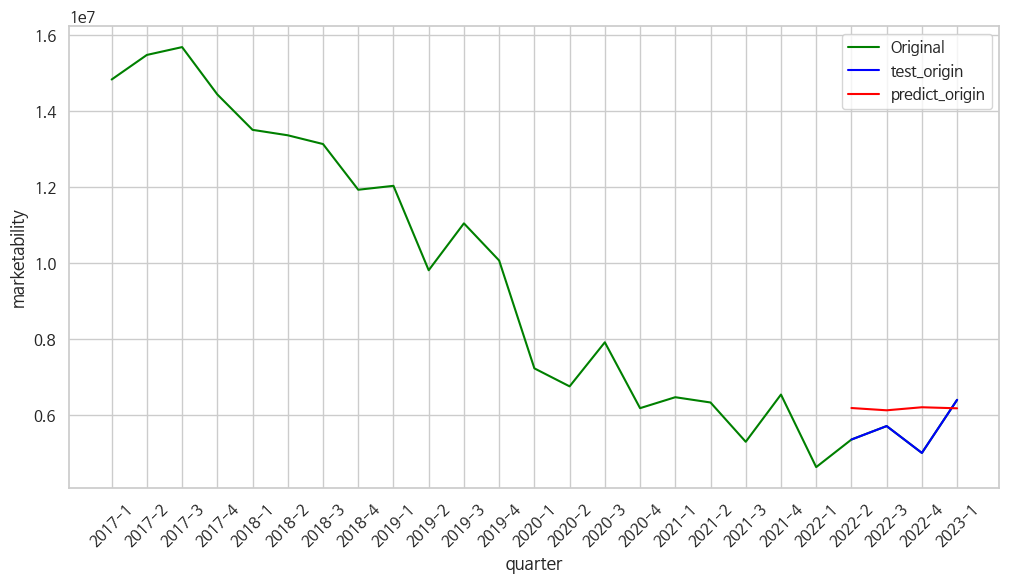

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -5.560507e+05
std      6.106184e+05
min     -1.202028e+06
25%     -9.228998e+05
50%     -6.224241e+05
75%     -2.555751e+05
max      2.226730e+05
dtype: float64

In [ ]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.14878559]]
--------------------------------------------------------------------------------
예측된 시장성  : 6282975.0 


### 순점포증감률

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '성장성', '시장성']]
y = sin_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   7.764672e+09  1.000000  1.483898e+07
1   8.397734e+09  1.081531  1.548575e+07
2   8.315531e+09  0.990211  1.569170e+07
3   7.405161e+09  0.890522  1.444630e+07
4   7.422751e+09  1.002375  1.351441e+07
5   7.479498e+09  1.007645  1.337102e+07
6   7.689227e+09  1.028040  1.314082e+07
7   7.025772e+09  0.913716  1.193786e+07
8   6.333135e+09  0.901415  1.204067e+07
9   5.662680e+09  0.894135  9.819223e+06
10  6.110785e+09  1.079133  1.105319e+07
11  6.070274e+09  0.993370  1.007525e+07
12  4.943021e+09  0.814299  7.236823e+06
13  5.211885e+09  1.054393  6.763077e+06
14  5.043146e+09  0.967624  7.922830e+06
15  4.309295e+09  0.854485  6.189667e+06
16  4.371076e+09  1.014337  6.477798e+06
17  4.601725e+09  1.052767  6.339091e+06
18  4.375422e+09  0.950822  5.305175e+06
19  4.420623e+09  1.010331  6.547636e+06
20  3.687315e+09  0.834117  4.638403e+06
21  4.149197e+09  1.125263  5.363553e+06
22  3.988592e+09  0.961292  5.718409e+06
23  3.736932e+09

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.01053354 0.39427735 0.03374615]
 [0.19995778 0.31011855 0.16014519]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4200
Epoch 1: val_loss improved from inf to 0.25814, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4200 - val_loss: 0.2581
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4023
Epoch 2: val_loss improved from 0.25814 to 0.24969, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4023 - val_loss: 0.2497
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3852
Epoch 3: val_loss improved from 0.24969 to 0.24152, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.3852 - val_loss: 0.2415
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3687
Epoch 4: val_loss improved from 0.24152 to 0.23358, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.3687 - val_loss: 0.2336
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.32952124]
 [0.28139848]
 [0.3612594 ]
 [0.30756655]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.448788,0.329521
2022-3,0.350160,0.281398
2022-4,0.830078,0.361259
2023-1,0.318166,0.307567


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.448788,0.329521,-0.568182,-1.279088,0.710906
2022-3,0.350160,0.281398,-1.156069,-1.565930,0.409860
2022-4,0.830078,0.361259,1.704545,-1.089908,2.794453
2023-1,0.318166,0.307567,-1.346775,-1.409951,0.063177


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


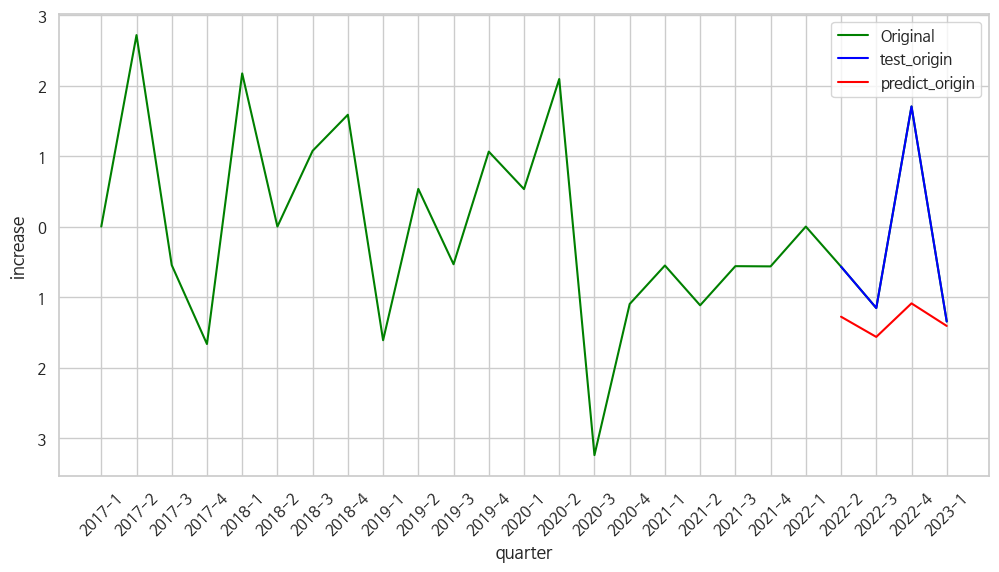

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.994599
std      1.228743
min      0.063177
25%      0.323189
50%      0.560383
75%      1.231793
max      2.794453
dtype: float64

In [ ]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 25ms/step
[[0.30371657]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.432899832725525 


### 추가


In [ ]:
sin_hair.loc[25] = ['2023-2', '미용실', sales, growth, increase, marketability]

<ipython-input-122-56a859aac733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hair.loc[25] = ['2023-2', '미용실', sales, growth, increase, marketability]


In [ ]:
sin_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,7.764672e+09,1.000000,0.000000,1.483898e+07
1,2017-2,미용실,8.397734e+09,1.081531,2.717391,1.548575e+07
2,2017-3,미용실,8.315531e+09,0.990211,-0.546448,1.569170e+07
3,2017-4,미용실,7.405161e+09,0.890522,-1.666667,1.444630e+07
4,2018-1,미용실,7.422751e+09,1.002375,2.173913,1.351441e+07
5,2018-2,미용실,7.479498e+09,1.007645,0.000000,1.337102e+07
6,2018-3,미용실,7.689227e+09,1.028040,1.075269,1.314082e+07
7,2018-4,미용실,7.025772e+09,0.913716,1.587302,1.193786e+07
8,2019-1,미용실,6.333135e+09,0.901415,-1.612903,1.204067e+07
9,2019-2,미용실,5.662680e+09,0.894135,0.534759,9.819223e+06


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [ ]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_hair[['성장성', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  1.483898e+07  0.000000
1   1.081531  1.548575e+07  2.717391
2   0.990211  1.569170e+07 -0.546448
3   0.890522  1.444630e+07 -1.666667
4   1.002375  1.351441e+07  2.173913
5   1.007645  1.337102e+07  0.000000
6   1.028040  1.314082e+07  1.075269
7   0.913716  1.193786e+07  1.587302
8   0.901415  1.204067e+07 -1.612903
9   0.894135  9.819223e+06  0.534759
10  1.079133  1.105319e+07 -0.534759
11  0.993370  1.007525e+07  1.063830
12  0.814299  7.236823e+06  0.531915
13  1.054393  6.763077e+06  2.094241
14  0.967624  7.922830e+06 -3.243243
15  0.854485  6.189667e+06 -1.098901
16  1.014337  6.477798e+06 -0.552486
17  1.052767  6.339091e+06 -1.117318
18  0.950822  5.305175e+06 -0.561798
19  1.010331  6.547636e+06 -0.564972
20  0.834117  4.638403e+06  0.000000
21  1.125263  5.363553e+06 -0.568182
22  0.961292  5.718409e+06 -1.156069
23  0.936905  5.011409e+06  1.704545
24  0.910735  6.408536e+06 -1.346775
25  0.913184  6.282975e+06 -1.432900
-

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.31011855 0.16014519 0.31816557]
 [0.31799477 0.14878559 0.30371656]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4922
Epoch 1: val_loss improved from inf to 0.02838, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4922 - val_loss: 0.0284
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4734
Epoch 2: val_loss improved from 0.02838 to 0.02549, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.4734 - val_loss: 0.0255
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4553
Epoch 3: val_loss improved from 0.02549 to 0.02283, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.4553 - val_loss: 0.0228
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4378
Epoch 4: val_loss improved from 0.02283 to 0.02039, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4378 - val_loss: 0.0204
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 840ms/step
[[0.14265159]
 [0.15886837]
 [0.14942935]
 [0.15302248]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.063960,0.142652
2022-4,0.010534,0.158868
2023-1,0.199958,0.149429
2023-2,0.178119,0.153022


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.063960,0.142652,3.988592e+09,4.359264e+09,-370672030.0
2022-4,0.010534,0.158868,3.736932e+09,4.435652e+09,-698719370.0
2023-1,0.199958,0.149429,4.629200e+09,4.391190e+09,238010368.0
2023-2,0.178119,0.153022,4.526328e+09,4.408115e+09,118213120.0


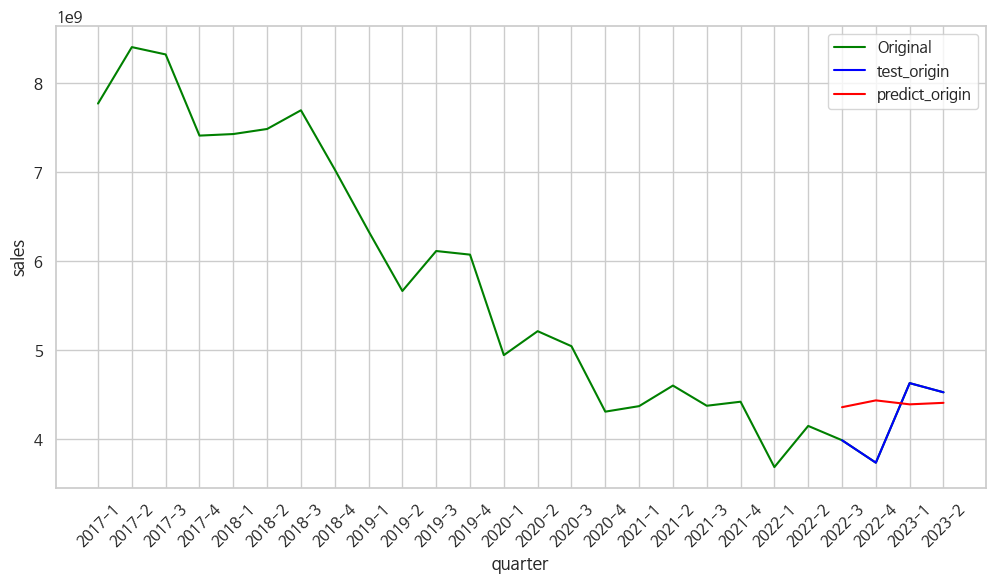

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.782920e+08
std      4.355371e+08
min     -6.987194e+08
25%     -4.526839e+08
50%     -1.262295e+08
75%      1.481624e+08
max      2.380104e+08
dtype: float64

In [ ]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 39ms/step
[[0.12993959]]
--------------------------------------------------------------------------------
예측된 매출  : 4299384832.0 


### 성장성

In [ ]:
X = sin_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   7.764672e+09  1.483898e+07  0.000000
1   8.397734e+09  1.548575e+07  2.717391
2   8.315531e+09  1.569170e+07 -0.546448
3   7.405161e+09  1.444630e+07 -1.666667
4   7.422751e+09  1.351441e+07  2.173913
5   7.479498e+09  1.337102e+07  0.000000
6   7.689227e+09  1.314082e+07  1.075269
7   7.025772e+09  1.193786e+07  1.587302
8   6.333135e+09  1.204067e+07 -1.612903
9   5.662680e+09  9.819223e+06  0.534759
10  6.110785e+09  1.105319e+07 -0.534759
11  6.070274e+09  1.007525e+07  1.063830
12  4.943021e+09  7.236823e+06  0.531915
13  5.211885e+09  6.763077e+06  2.094241
14  5.043146e+09  7.922830e+06 -3.243243
15  4.309295e+09  6.189667e+06 -1.098901
16  4.371076e+09  6.477798e+06 -0.552486
17  4.601725e+09  6.339091e+06 -1.117318
18  4.375422e+09  5.305175e+06 -0.561798
19  4.420623e+09  6.547636e+06 -0.564972
20  3.687315e+09  4.638403e+06  0.000000
21  4.149197e+09  5.363553e+06 -0.568182
22  3.988592e+09  5.718409e+06 -1.156069
23  3.736932e+09

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.19995778 0.16014519 0.31816557]
 [0.17811853 0.14878559 0.30371656]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3308
Epoch 1: val_loss improved from inf to 0.36030, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.3308 - val_loss: 0.3603
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3159
Epoch 2: val_loss improved from 0.36030 to 0.35136, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.3159 - val_loss: 0.3514
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3016
Epoch 3: val_loss improved from 0.35136 to 0.34269, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.3016 - val_loss: 0.3427
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2880
Epoch 4: val_loss improved from 0.34269 to 0.33425, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.2880 - val_loss: 0.3343
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.30253446]
 [0.30039144]
 [0.31396192]
 [0.34441695]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.472702,0.302534
2022-4,0.394277,0.300391
2023-1,0.310119,0.313962
2023-2,0.317995,0.344417


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 3].values       # 성장성이 sin_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.472702,0.302534,0.961292,0.908377,0.052916
2022-4,0.394277,0.300391,0.936905,0.907710,0.029195
2023-1,0.310119,0.313962,0.910735,0.911930,-0.001195
2023-2,0.317995,0.344417,0.913184,0.921400,-0.008216


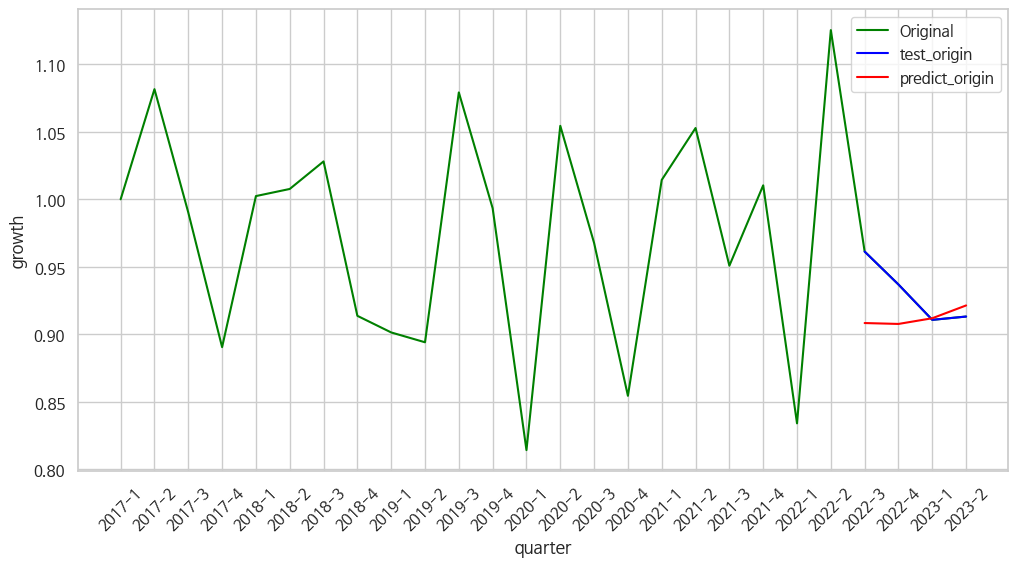

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.018175
std      0.028285
min     -0.008216
25%     -0.002950
50%      0.014000
75%      0.035125
max      0.052916
dtype: float64

In [ ]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 34ms/step
[[0.30994353]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9106804728507996 


### 시장성

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   7.764672e+09  1.000000  0.000000
1   8.397734e+09  1.081531  2.717391
2   8.315531e+09  0.990211 -0.546448
3   7.405161e+09  0.890522 -1.666667
4   7.422751e+09  1.002375  2.173913
5   7.479498e+09  1.007645  0.000000
6   7.689227e+09  1.028040  1.075269
7   7.025772e+09  0.913716  1.587302
8   6.333135e+09  0.901415 -1.612903
9   5.662680e+09  0.894135  0.534759
10  6.110785e+09  1.079133 -0.534759
11  6.070274e+09  0.993370  1.063830
12  4.943021e+09  0.814299  0.531915
13  5.211885e+09  1.054393  2.094241
14  5.043146e+09  0.967624 -3.243243
15  4.309295e+09  0.854485 -1.098901
16  4.371076e+09  1.014337 -0.552486
17  4.601725e+09  1.052767 -1.117318
18  4.375422e+09  0.950822 -0.561798
19  4.420623e+09  1.010331 -0.564972
20  3.687315e+09  0.834117  0.000000
21  4.149197e+09  1.125263 -0.568182
22  3.988592e+09  0.961292 -1.156069
23  3.736932e+09  0.936905  1.704545
24  4.629200e+09  0.910735 -1.346775
25  4.526328e+09  0.913184 -1.432900
-

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.19995778 0.31011855 0.31816557]
 [0.17811853 0.31799477 0.30371656]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4939
Epoch 1: val_loss improved from inf to 0.02857, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4939 - val_loss: 0.0286
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4755
Epoch 2: val_loss improved from 0.02857 to 0.02561, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.4755 - val_loss: 0.0256
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4576
Epoch 3: val_loss improved from 0.02561 to 0.02290, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.4576 - val_loss: 0.0229
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4404
Epoch 4: val_loss improved from 0.02290 to 0.02042, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4404 - val_loss: 0.0204
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 891ms/step
[[0.12367745]
 [0.12944865]
 [0.12809849]
 [0.13615806]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.097709,0.123677
2022-4,0.033746,0.129449
2023-1,0.160145,0.128098
2023-2,0.148786,0.136158


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 5].values       # 시장성이 sin_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.097709,0.123677,5.718409e+06,6005447.0,-2.870382e+05
2022-4,0.033746,0.129449,5.011409e+06,6069238.0,-1.057829e+06
2023-1,0.160145,0.128098,6.408536e+06,6054314.0,3.542220e+05
2023-2,0.148786,0.136158,6.282975e+06,6143399.0,1.395760e+05


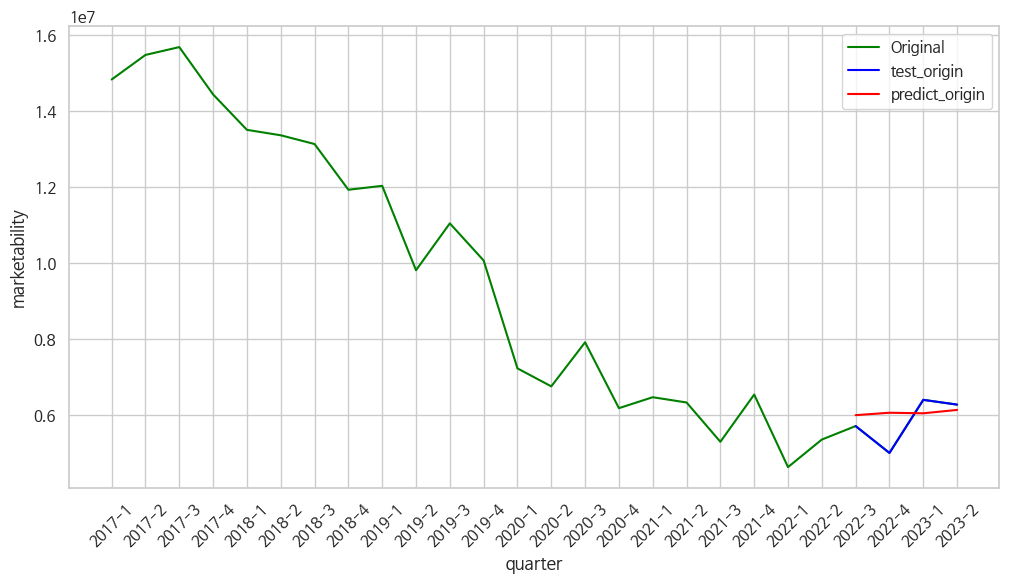

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -2.127672e+05
std      6.232356e+05
min     -1.057829e+06
25%     -4.797358e+05
50%     -7.373108e+04
75%      1.932375e+05
max      3.542220e+05
dtype: float64

In [ ]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.12003975]]
--------------------------------------------------------------------------------
예측된 시장성  : 5965238.5 


### 순점포증감률

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '성장성', '시장성']]
y = sin_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   7.764672e+09  1.000000  1.483898e+07
1   8.397734e+09  1.081531  1.548575e+07
2   8.315531e+09  0.990211  1.569170e+07
3   7.405161e+09  0.890522  1.444630e+07
4   7.422751e+09  1.002375  1.351441e+07
5   7.479498e+09  1.007645  1.337102e+07
6   7.689227e+09  1.028040  1.314082e+07
7   7.025772e+09  0.913716  1.193786e+07
8   6.333135e+09  0.901415  1.204067e+07
9   5.662680e+09  0.894135  9.819223e+06
10  6.110785e+09  1.079133  1.105319e+07
11  6.070274e+09  0.993370  1.007525e+07
12  4.943021e+09  0.814299  7.236823e+06
13  5.211885e+09  1.054393  6.763077e+06
14  5.043146e+09  0.967624  7.922830e+06
15  4.309295e+09  0.854485  6.189667e+06
16  4.371076e+09  1.014337  6.477798e+06
17  4.601725e+09  1.052767  6.339091e+06
18  4.375422e+09  0.950822  5.305175e+06
19  4.420623e+09  1.010331  6.547636e+06
20  3.687315e+09  0.834117  4.638403e+06
21  4.149197e+09  1.125263  5.363553e+06
22  3.988592e+09  0.961292  5.718409e+06
23  3.736932e+09

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.19995778 0.31011855 0.16014519]
 [0.17811853 0.31799477 0.14878559]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4550
Epoch 1: val_loss improved from inf to 0.18196, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4550 - val_loss: 0.1820
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4371
Epoch 2: val_loss improved from 0.18196 to 0.17496, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4371 - val_loss: 0.1750
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4199
Epoch 3: val_loss improved from 0.17496 to 0.16821, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4199 - val_loss: 0.1682
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4032
Epoch 4: val_loss improved from 0.16821 to 0.16168, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4032 - val_loss: 0.1617
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.28781945]
 [0.3726402 ]
 [0.3156222 ]
 [0.31128925]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.350160,0.287819
2022-4,0.830078,0.372640
2023-1,0.318166,0.315622
2023-2,0.303717,0.311289


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.350160,0.287819,-1.156069,-1.527657,0.371587
2022-4,0.830078,0.372640,1.704545,-1.022071,2.726617
2023-1,0.318166,0.315622,-1.346775,-1.361935,0.015160
2023-2,0.303717,0.311289,-1.432900,-1.387762,-0.045138


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


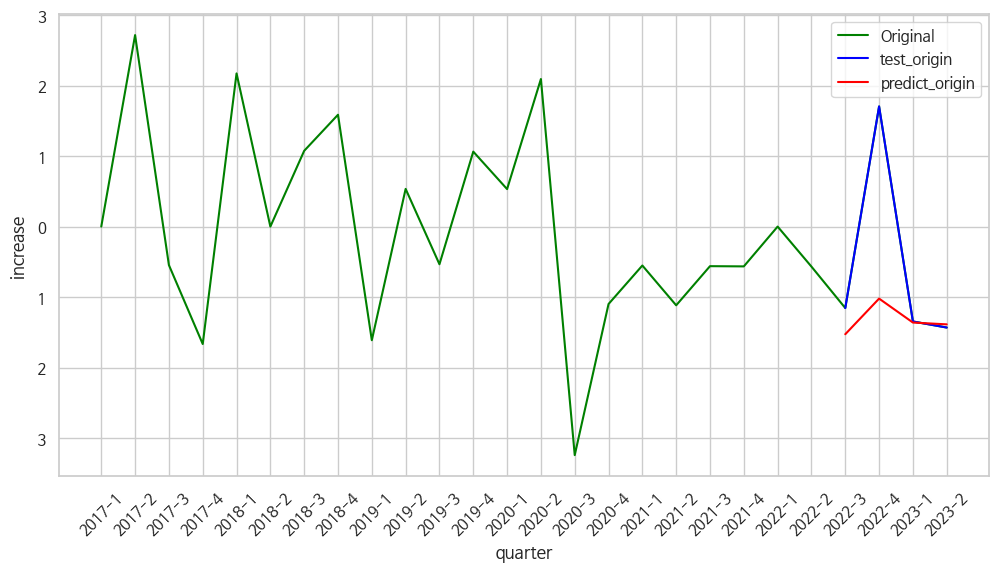

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.767057
std      1.319252
min     -0.045138
25%      0.000086
50%      0.193374
75%      0.960345
max      2.726617
dtype: float64

In [ ]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.35252604]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.1419644355773926 


### 추가

In [ ]:
sin_hair.loc[26] = ['2023-3', '미용실', sales, growth, increase, marketability]

<ipython-input-172-a2304eabdb6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hair.loc[26] = ['2023-3', '미용실', sales, growth, increase, marketability]


In [ ]:
sin_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,7.764672e+09,1.000000,0.000000,1.483898e+07
1,2017-2,미용실,8.397734e+09,1.081531,2.717391,1.548575e+07
2,2017-3,미용실,8.315531e+09,0.990211,-0.546448,1.569170e+07
3,2017-4,미용실,7.405161e+09,0.890522,-1.666667,1.444630e+07
4,2018-1,미용실,7.422751e+09,1.002375,2.173913,1.351441e+07
5,2018-2,미용실,7.479498e+09,1.007645,0.000000,1.337102e+07
6,2018-3,미용실,7.689227e+09,1.028040,1.075269,1.314082e+07
7,2018-4,미용실,7.025772e+09,0.913716,1.587302,1.193786e+07
8,2019-1,미용실,6.333135e+09,0.901415,-1.612903,1.204067e+07
9,2019-2,미용실,5.662680e+09,0.894135,0.534759,9.819223e+06


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [ ]:
### X / y 데이터 생성
X = sin_hair[['성장성', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  1.483898e+07  0.000000
1   1.081531  1.548575e+07  2.717391
2   0.990211  1.569170e+07 -0.546448
3   0.890522  1.444630e+07 -1.666667
4   1.002375  1.351441e+07  2.173913
5   1.007645  1.337102e+07  0.000000
6   1.028040  1.314082e+07  1.075269
7   0.913716  1.193786e+07  1.587302
8   0.901415  1.204067e+07 -1.612903
9   0.894135  9.819223e+06  0.534759
10  1.079133  1.105319e+07 -0.534759
11  0.993370  1.007525e+07  1.063830
12  0.814299  7.236823e+06  0.531915
13  1.054393  6.763077e+06  2.094241
14  0.967624  7.922830e+06 -3.243243
15  0.854485  6.189667e+06 -1.098901
16  1.014337  6.477798e+06 -0.552486
17  1.052767  6.339091e+06 -1.117318
18  0.950822  5.305175e+06 -0.561798
19  1.010331  6.547636e+06 -0.564972
20  0.834117  4.638403e+06  0.000000
21  1.125263  5.363553e+06 -0.568182
22  0.961292  5.718409e+06 -1.156069
23  0.936905  5.011409e+06  1.704545
24  0.910735  6.408536e+06 -1.346775
25  0.913184  6.282975e+06 -1.432900
2

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.31799477 0.14878559 0.30371656]
 [0.30994355 0.12003975 0.35252603]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4922
Epoch 1: val_loss improved from inf to 0.02569, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4922 - val_loss: 0.0257
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4734
Epoch 2: val_loss improved from 0.02569 to 0.02300, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.4734 - val_loss: 0.0230
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4553
Epoch 3: val_loss improved from 0.02300 to 0.02054, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4553 - val_loss: 0.0205
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4378
Epoch 4: val_loss improved from 0.02054 to 0.01828, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.4378 - val_loss: 0.0183
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.14622346]
 [0.13770443]
 [0.14081207]
 [0.11962967]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.010534,0.146223
2023-1,0.199958,0.137704
2023-2,0.178119,0.140812
2023-3,0.129940,0.119630


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.010534,0.146223,3.736932e+09,4.376089e+09,-639156362.0
2023-1,0.199958,0.137704,4.629200e+09,4.335961e+09,293239296.0
2023-2,0.178119,0.140812,4.526328e+09,4.350599e+09,175729152.0
2023-3,0.129940,0.119630,4.299385e+09,4.250821e+09,48563968.0


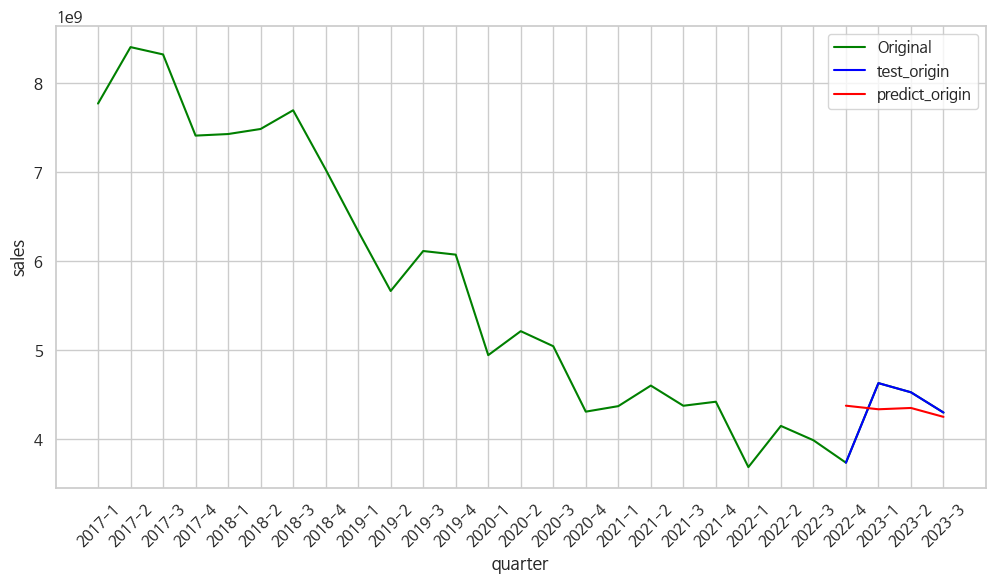

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.040599e+07
std      4.179518e+08
min     -6.391564e+08
25%     -1.233661e+08
50%      1.121466e+08
75%      2.051067e+08
max      2.932393e+08
dtype: float64

In [ ]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 34ms/step
[[0.1197707]]
--------------------------------------------------------------------------------
예측된 매출  : 4251485184.0 


### 성장성

In [ ]:
X = sin_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   7.764672e+09  1.483898e+07  0.000000
1   8.397734e+09  1.548575e+07  2.717391
2   8.315531e+09  1.569170e+07 -0.546448
3   7.405161e+09  1.444630e+07 -1.666667
4   7.422751e+09  1.351441e+07  2.173913
5   7.479498e+09  1.337102e+07  0.000000
6   7.689227e+09  1.314082e+07  1.075269
7   7.025772e+09  1.193786e+07  1.587302
8   6.333135e+09  1.204067e+07 -1.612903
9   5.662680e+09  9.819223e+06  0.534759
10  6.110785e+09  1.105319e+07 -0.534759
11  6.070274e+09  1.007525e+07  1.063830
12  4.943021e+09  7.236823e+06  0.531915
13  5.211885e+09  6.763077e+06  2.094241
14  5.043146e+09  7.922830e+06 -3.243243
15  4.309295e+09  6.189667e+06 -1.098901
16  4.371076e+09  6.477798e+06 -0.552486
17  4.601725e+09  6.339091e+06 -1.117318
18  4.375422e+09  5.305175e+06 -0.561798
19  4.420623e+09  6.547636e+06 -0.564972
20  3.687315e+09  4.638403e+06  0.000000
21  4.149197e+09  5.363553e+06 -0.568182
22  3.988592e+09  5.718409e+06 -1.156069
23  3.736932e+09

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.17811853 0.14878559 0.30371656]
 [0.1299396  0.12003975 0.35252603]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3308
Epoch 1: val_loss improved from inf to 0.34495, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3308 - val_loss: 0.3449
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3159
Epoch 2: val_loss improved from 0.34495 to 0.33620, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.3159 - val_loss: 0.3362
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3016
Epoch 3: val_loss improved from 0.33620 to 0.32770, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.3016 - val_loss: 0.3277
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2880
Epoch 4: val_loss improved from 0.32770 to 0.31944, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2880 - val_loss: 0.3194
Epoch 5/100
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 847ms/step
[[0.30039144]
 [0.31396192]
 [0.34441695]
 [0.30994353]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.394277,0.300391
2023-1,0.310119,0.313962
2023-2,0.317995,0.344417
2023-3,0.309944,0.309944


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 3].values       # 성장성이 sin_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.394277,0.300391,0.936905,0.90771,0.029195
2023-1,0.310119,0.313962,0.910735,0.91193,-0.001195
2023-2,0.317995,0.344417,0.913184,0.92140,-0.008216
2023-3,0.309944,0.309944,0.910680,0.91068,0.000000


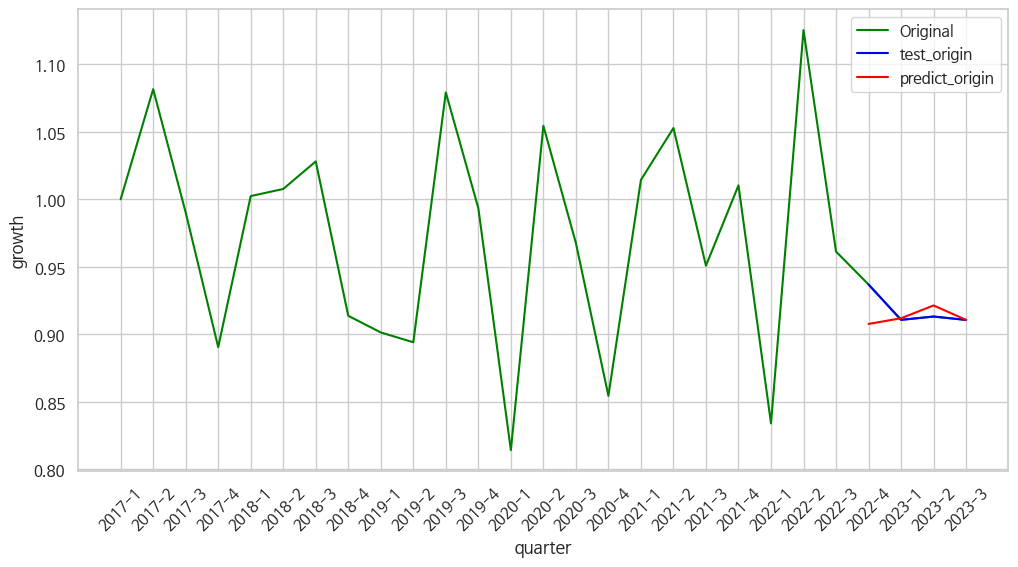

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.004946
std      0.016567
min     -0.008216
25%     -0.002950
50%     -0.000598
75%      0.007299
max      0.029195
dtype: float64

In [ ]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 35ms/step
[[0.30386108]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9087890386581421 


###시장성

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   7.764672e+09  1.000000  0.000000
1   8.397734e+09  1.081531  2.717391
2   8.315531e+09  0.990211 -0.546448
3   7.405161e+09  0.890522 -1.666667
4   7.422751e+09  1.002375  2.173913
5   7.479498e+09  1.007645  0.000000
6   7.689227e+09  1.028040  1.075269
7   7.025772e+09  0.913716  1.587302
8   6.333135e+09  0.901415 -1.612903
9   5.662680e+09  0.894135  0.534759
10  6.110785e+09  1.079133 -0.534759
11  6.070274e+09  0.993370  1.063830
12  4.943021e+09  0.814299  0.531915
13  5.211885e+09  1.054393  2.094241
14  5.043146e+09  0.967624 -3.243243
15  4.309295e+09  0.854485 -1.098901
16  4.371076e+09  1.014337 -0.552486
17  4.601725e+09  1.052767 -1.117318
18  4.375422e+09  0.950822 -0.561798
19  4.420623e+09  1.010331 -0.564972
20  3.687315e+09  0.834117  0.000000
21  4.149197e+09  1.125263 -0.568182
22  3.988592e+09  0.961292 -1.156069
23  3.736932e+09  0.936905  1.704545
24  4.629200e+09  0.910735 -1.346775
25  4.526328e+09  0.913184 -1.432900
2

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.17811853 0.31799477 0.30371656]
 [0.1299396  0.30994355 0.35252603]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4939
Epoch 1: val_loss improved from inf to 0.02678, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4939 - val_loss: 0.0268
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4755
Epoch 2: val_loss improved from 0.02678 to 0.02393, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.4755 - val_loss: 0.0239
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4576
Epoch 3: val_loss improved from 0.02393 to 0.02131, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4576 - val_loss: 0.0213
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4404
Epoch 4: val_loss improved from 0.02131 to 0.01892, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.4404 - val_loss: 0.0189
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.12944865]
 [0.12809849]
 [0.13615806]
 [0.12003975]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.033746,0.129449
2023-1,0.160145,0.128098
2023-2,0.148786,0.136158
2023-3,0.120040,0.120040


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 5].values       # 시장성이 sin_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.033746,0.129449,5.011409e+06,6069238.0,-1.057829e+06
2023-1,0.160145,0.128098,6.408536e+06,6054314.0,3.542220e+05
2023-2,0.148786,0.136158,6.282975e+06,6143399.0,1.395760e+05
2023-3,0.120040,0.120040,5.965238e+06,5965238.5,0.000000e+00


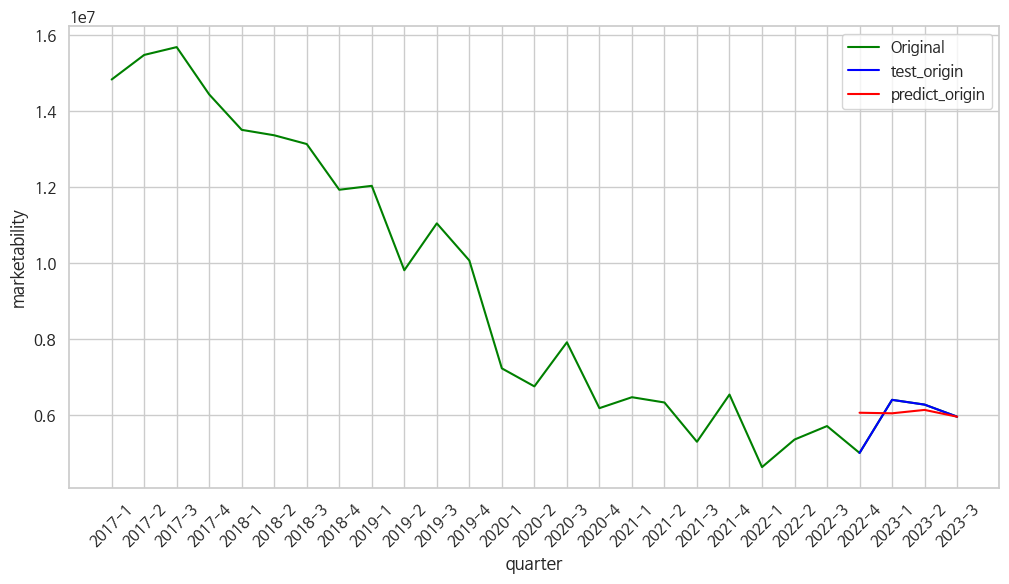

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.410077e+05
std      6.283374e+05
min     -1.057829e+06
25%     -2.644572e+05
50%      6.978800e+04
75%      1.932375e+05
max      3.542220e+05
dtype: float64

In [ ]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 27ms/step
[[0.11868426]]
--------------------------------------------------------------------------------
예측된 시장성  : 5950255.5 


### 순점포증감률

In [ ]:
### X / y 데이터 생성
X = sin_hair[['분기당_매출_금액', '성장성', '시장성']]
y = sin_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   7.764672e+09  1.000000  1.483898e+07
1   8.397734e+09  1.081531  1.548575e+07
2   8.315531e+09  0.990211  1.569170e+07
3   7.405161e+09  0.890522  1.444630e+07
4   7.422751e+09  1.002375  1.351441e+07
5   7.479498e+09  1.007645  1.337102e+07
6   7.689227e+09  1.028040  1.314082e+07
7   7.025772e+09  0.913716  1.193786e+07
8   6.333135e+09  0.901415  1.204067e+07
9   5.662680e+09  0.894135  9.819223e+06
10  6.110785e+09  1.079133  1.105319e+07
11  6.070274e+09  0.993370  1.007525e+07
12  4.943021e+09  0.814299  7.236823e+06
13  5.211885e+09  1.054393  6.763077e+06
14  5.043146e+09  0.967624  7.922830e+06
15  4.309295e+09  0.854485  6.189667e+06
16  4.371076e+09  1.014337  6.477798e+06
17  4.601725e+09  1.052767  6.339091e+06
18  4.375422e+09  0.950822  5.305175e+06
19  4.420623e+09  1.010331  6.547636e+06
20  3.687315e+09  0.834117  4.638403e+06
21  4.149197e+09  1.125263  5.363553e+06
22  3.988592e+09  0.961292  5.718409e+06
23  3.736932e+09

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.17811853 0.31799477 0.14878559]
 [0.1299396  0.30994355 0.12003975]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4550
Epoch 1: val_loss improved from inf to 0.17630, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4550 - val_loss: 0.1763
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4371
Epoch 2: val_loss improved from 0.17630 to 0.16950, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.4371 - val_loss: 0.1695
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4199
Epoch 3: val_loss improved from 0.16950 to 0.16295, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4199 - val_loss: 0.1629
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4032
Epoch 4: val_loss improved from 0.16295 to 0.15661, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4032 - val_loss: 0.1566
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.37463632]
 [0.31983185]
 [0.31559697]
 [0.35437965]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.830078,0.374636
2023-1,0.318166,0.319832
2023-2,0.303717,0.315597
2023-3,0.352526,0.354380


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.830078,0.374636,1.704545,-1.010173,2.714719
2023-1,0.318166,0.319832,-1.346775,-1.336843,-0.009932
2023-2,0.303717,0.315597,-1.432900,-1.362085,-0.070815
2023-3,0.352526,0.354380,-1.141964,-1.130916,-0.011049


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


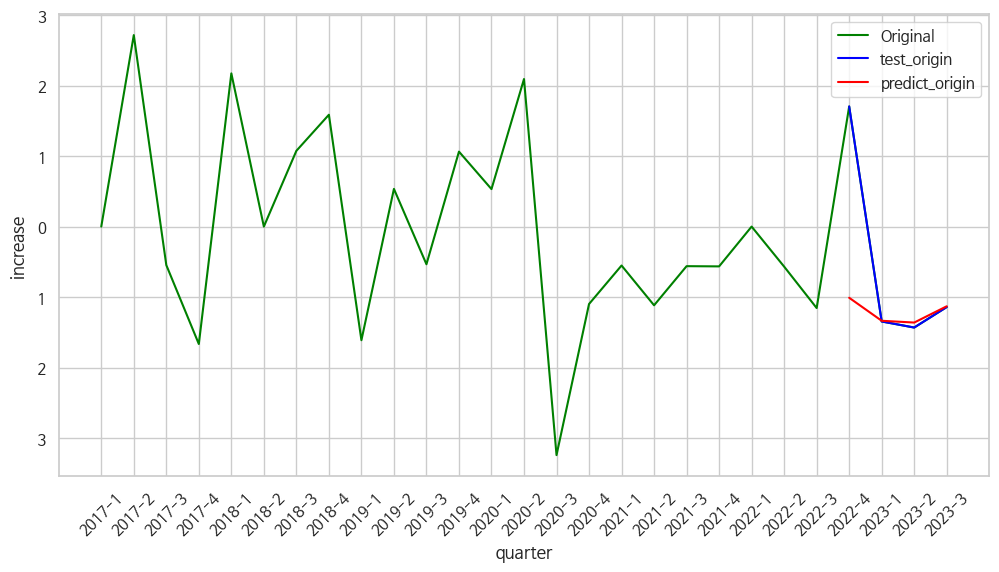

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.655731
std      1.372953
min     -0.070815
25%     -0.025990
50%     -0.010490
75%      0.671231
max      2.714719
dtype: float64

In [ ]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 29ms/step
[[0.34391135]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.1933133602142334 


### 추가

In [ ]:
sin_hair.loc[27] = ['2023-4', '미용실', sales, growth, increase, marketability]

<ipython-input-222-847f395ba068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_hair.loc[27] = ['2023-4', '미용실', sales, growth, increase, marketability]


In [ ]:
final_sin_hair = sin_hair
final_sin_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,7.764672e+09,1.000000,0.000000,1.483898e+07
1,2017-2,미용실,8.397734e+09,1.081531,2.717391,1.548575e+07
2,2017-3,미용실,8.315531e+09,0.990211,-0.546448,1.569170e+07
3,2017-4,미용실,7.405161e+09,0.890522,-1.666667,1.444630e+07
4,2018-1,미용실,7.422751e+09,1.002375,2.173913,1.351441e+07
5,2018-2,미용실,7.479498e+09,1.007645,0.000000,1.337102e+07
6,2018-3,미용실,7.689227e+09,1.028040,1.075269,1.314082e+07
7,2018-4,미용실,7.025772e+09,0.913716,1.587302,1.193786e+07
8,2019-1,미용실,6.333135e+09,0.901415,-1.612903,1.204067e+07
9,2019-2,미용실,5.662680e+09,0.894135,0.534759,9.819223e+06


## 최종결과

In [ ]:
### X / y 데이터 생성
X = sin_hair[['성장성', '시장성', '순점포증감률']]
y = sin_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  1.483898e+07  0.000000
1   1.081531  1.548575e+07  2.717391
2   0.990211  1.569170e+07 -0.546448
3   0.890522  1.444630e+07 -1.666667
4   1.002375  1.351441e+07  2.173913
5   1.007645  1.337102e+07  0.000000
6   1.028040  1.314082e+07  1.075269
7   0.913716  1.193786e+07  1.587302
8   0.901415  1.204067e+07 -1.612903
9   0.894135  9.819223e+06  0.534759
10  1.079133  1.105319e+07 -0.534759
11  0.993370  1.007525e+07  1.063830
12  0.814299  7.236823e+06  0.531915
13  1.054393  6.763077e+06  2.094241
14  0.967624  7.922830e+06 -3.243243
15  0.854485  6.189667e+06 -1.098901
16  1.014337  6.477798e+06 -0.552486
17  1.052767  6.339091e+06 -1.117318
18  0.950822  5.305175e+06 -0.561798
19  1.010331  6.547636e+06 -0.564972
20  0.834117  4.638403e+06  0.000000
21  1.125263  5.363553e+06 -0.568182
22  0.961292  5.718409e+06 -1.156069
23  0.936905  5.011409e+06  1.704545
24  0.910735  6.408536e+06 -1.346775
25  0.913184  6.282975e+06 -1.432900
2

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.30994355 0.12003975 0.35252603]
 [0.30386104 0.11868423 0.34391135]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4615
Epoch 1: val_loss improved from inf to 0.01601, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4615 - val_loss: 0.0160
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4437
Epoch 2: val_loss improved from 0.01601 to 0.01400, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.4437 - val_loss: 0.0140
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4265
Epoch 3: val_loss improved from 0.01400 to 0.01219, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.4265 - val_loss: 0.0122
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4099
Epoch 4: val_loss improved from 0.01219 to 0.01059, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.4099 - val_loss: 0.0106
Epoch 5/100
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.10532458]
 [0.10726653]
 [0.09089646]
 [0.09117734]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.199958,0.105325
2023-2,0.178119,0.107267
2023-3,0.129940,0.090896
2023-4,0.119771,0.091177


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.199958,0.105325,4.629200e+09,4.183438e+09,445762048.0
2023-2,0.178119,0.107267,4.526328e+09,4.192585e+09,333742592.0
2023-3,0.129940,0.090896,4.299385e+09,4.115475e+09,183909632.0
2023-4,0.119771,0.091177,4.251485e+09,4.116798e+09,134686720.0


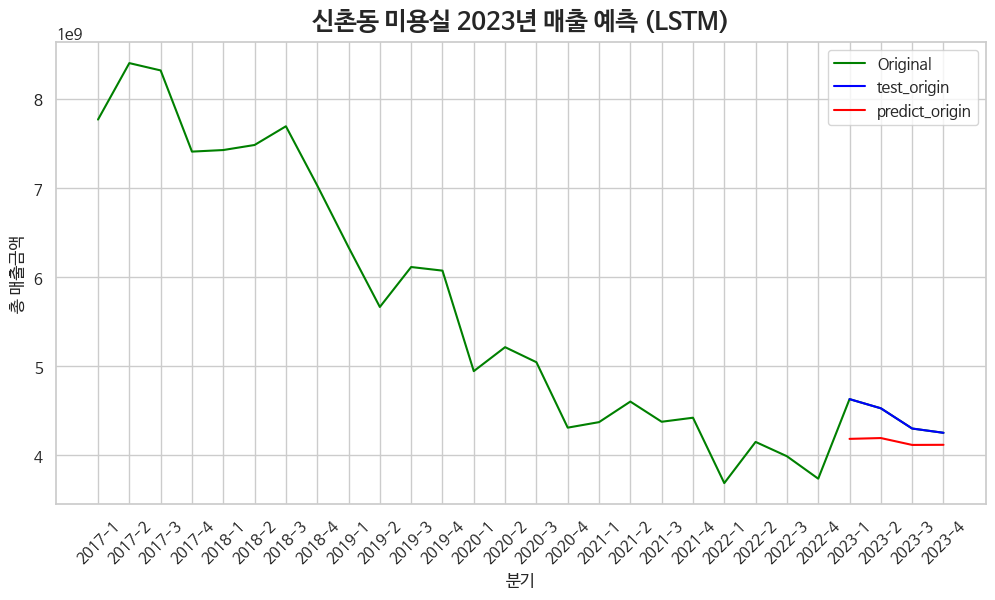

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화

plt.figure(figsize=(12, 6))
plt.plot(sin_hair['분기'], sin_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.title('신촌동 미용실 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출금액')
plt.legend()
plt.show()